In [19]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.nan) 
import pandas as pd
import seaborn as sns

from scipy.spatial import ConvexHull

from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch, Polygon
from mpl_toolkits.basemap import Basemap

%matplotlib inline

from sklearn.cluster import DBSCAN

df=pd.read_csv('testdata.csv')
df.head()

,g_case_no,y_lat,x_lng,f_addr,gf_addr,c_case_type,c_violation,c_violation_date,j_finding
0,11000001,43.091474,-87.984090,"5700 W CAPITOL DR MILWAUKEE, WI","5700 W Capitol Dr, Milwaukee, WI 53216, USA",Municipal citation,"Ordinance 110-35-1, Retail Theft",2011-01-03 14:40:00.000000,Guilty
1,11000002,43.068454,-87.918139,"2736 N 6TH ST MILWAUKEE, WI","2736 N 6th St, Milwaukee, WI 53212, USA",Municipal citation,"Ordinance 105-138-2, Resisting / Obstructing P...",2011-01-03 16:00:00.000000,Guilty
2,11000009,43.122443,-88.014475,"8223 W THURSTON AVE MILWAUKEE, WI","8223 W Thurston Ave, Milwaukee, WI 53218, USA",Summons & Complaint,"Ordinance 200 through 295, Building Code Viola...",2010-05-07 00:00:00.000000,Guilty
3,11000014,43.056875,-87.941243,"2020 N 23 ST MILWAUKEE, WI","2020 N 23rd St, Milwaukee, WI 53205, USA",Summons & Complaint,"Ordinance 200 through 295, Building Code Viola...",2010-06-08 00:00:00.000000,Guilty
4,11000024,43.054717,-87.936219,"1840 N 19 ST MILWAUKEE, WI","1840 N 19th St, Milwaukee, WI 53205, USA",Summons & Complaint,"Ordinance 200 through 295, Building Code Viola...",2010-03-30 00:00:00.000000,Guilty


In [20]:
#drops address errors outside milwaukee
df = df[(df['x_lng'] > -88.0676) & (df['x_lng'] < -87.8640)
               & (df['y_lat'] > 42.9197) & (df['y_lat'] < 43.1953)]

TypeError: unhashable type: 'numpy.ndarray'

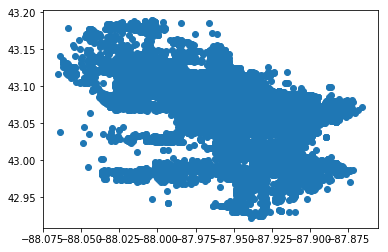

In [45]:
guilty=df[df.j_finding == 'Guilty']
guilty=guilty.append(df[df.j_finding == 'Guilty - Suspended Sentence'])
guilty2=guilty.drop_duplicates(['f_addr'], keep='first')
#notGuilty= df[! guilty]

#fig=plt.figure(figsize=(15,10), dpi=300)

#map=Basemap(projection = 'cyl',
#           resolution = 'h',
 #             lat_0 = 43.0389025,
  #            lon_0 = -87.9064736,
   #           llcrnrlon = -88.080736,
    #          llcrnrlat = 42.917670,
     #         urcrnrlon = -87.839722,
      #        urcrnrlat = 43.19712)
#map.readshapefile('mke_nei/mke_nei', name='ald',color='#003366', linewidth=0.75)

data=guilty2
e=.0014
p=10

dbscan=DBSCAN(eps=e, min_samples=p,metric='manhattan')
labels=dbscan.fit_predict(data[['x_lng','y_lat']])
data.assign(clusterLabel=labels)

#data.head()
l=max(labels)
#l

i=0
#for i in 0:(l+1):
#di=data[data.clusterLabel == i]
#hull=ConvexHull(data[[data.clusterLabel==i],['x_lng','y_lat']])
hull=ConvexHull(data[['x_lng','y_lat']])

plt.plot(data['x_lng'], data['y_lat'], 'o')
for simplex in hull.simplices:
    plt.plot(data[simplex, 0], data[simplex, 1], 'k-')

#by hull vertices
#plt.plot(data[hull.vertices,0], data[hull.vertices,1], 'r--', lw=2)
#plt.plot(data[hull.vertices[0],0], data[hull.vertices[0],1], 'ro')




plt.scatter(data['x_lng'], data['y_lat'], s=1 ,c=labels, cmap='tab20')
plt.title('DBScan Example')

plt.show()

TypeError: unhashable type: 'list'

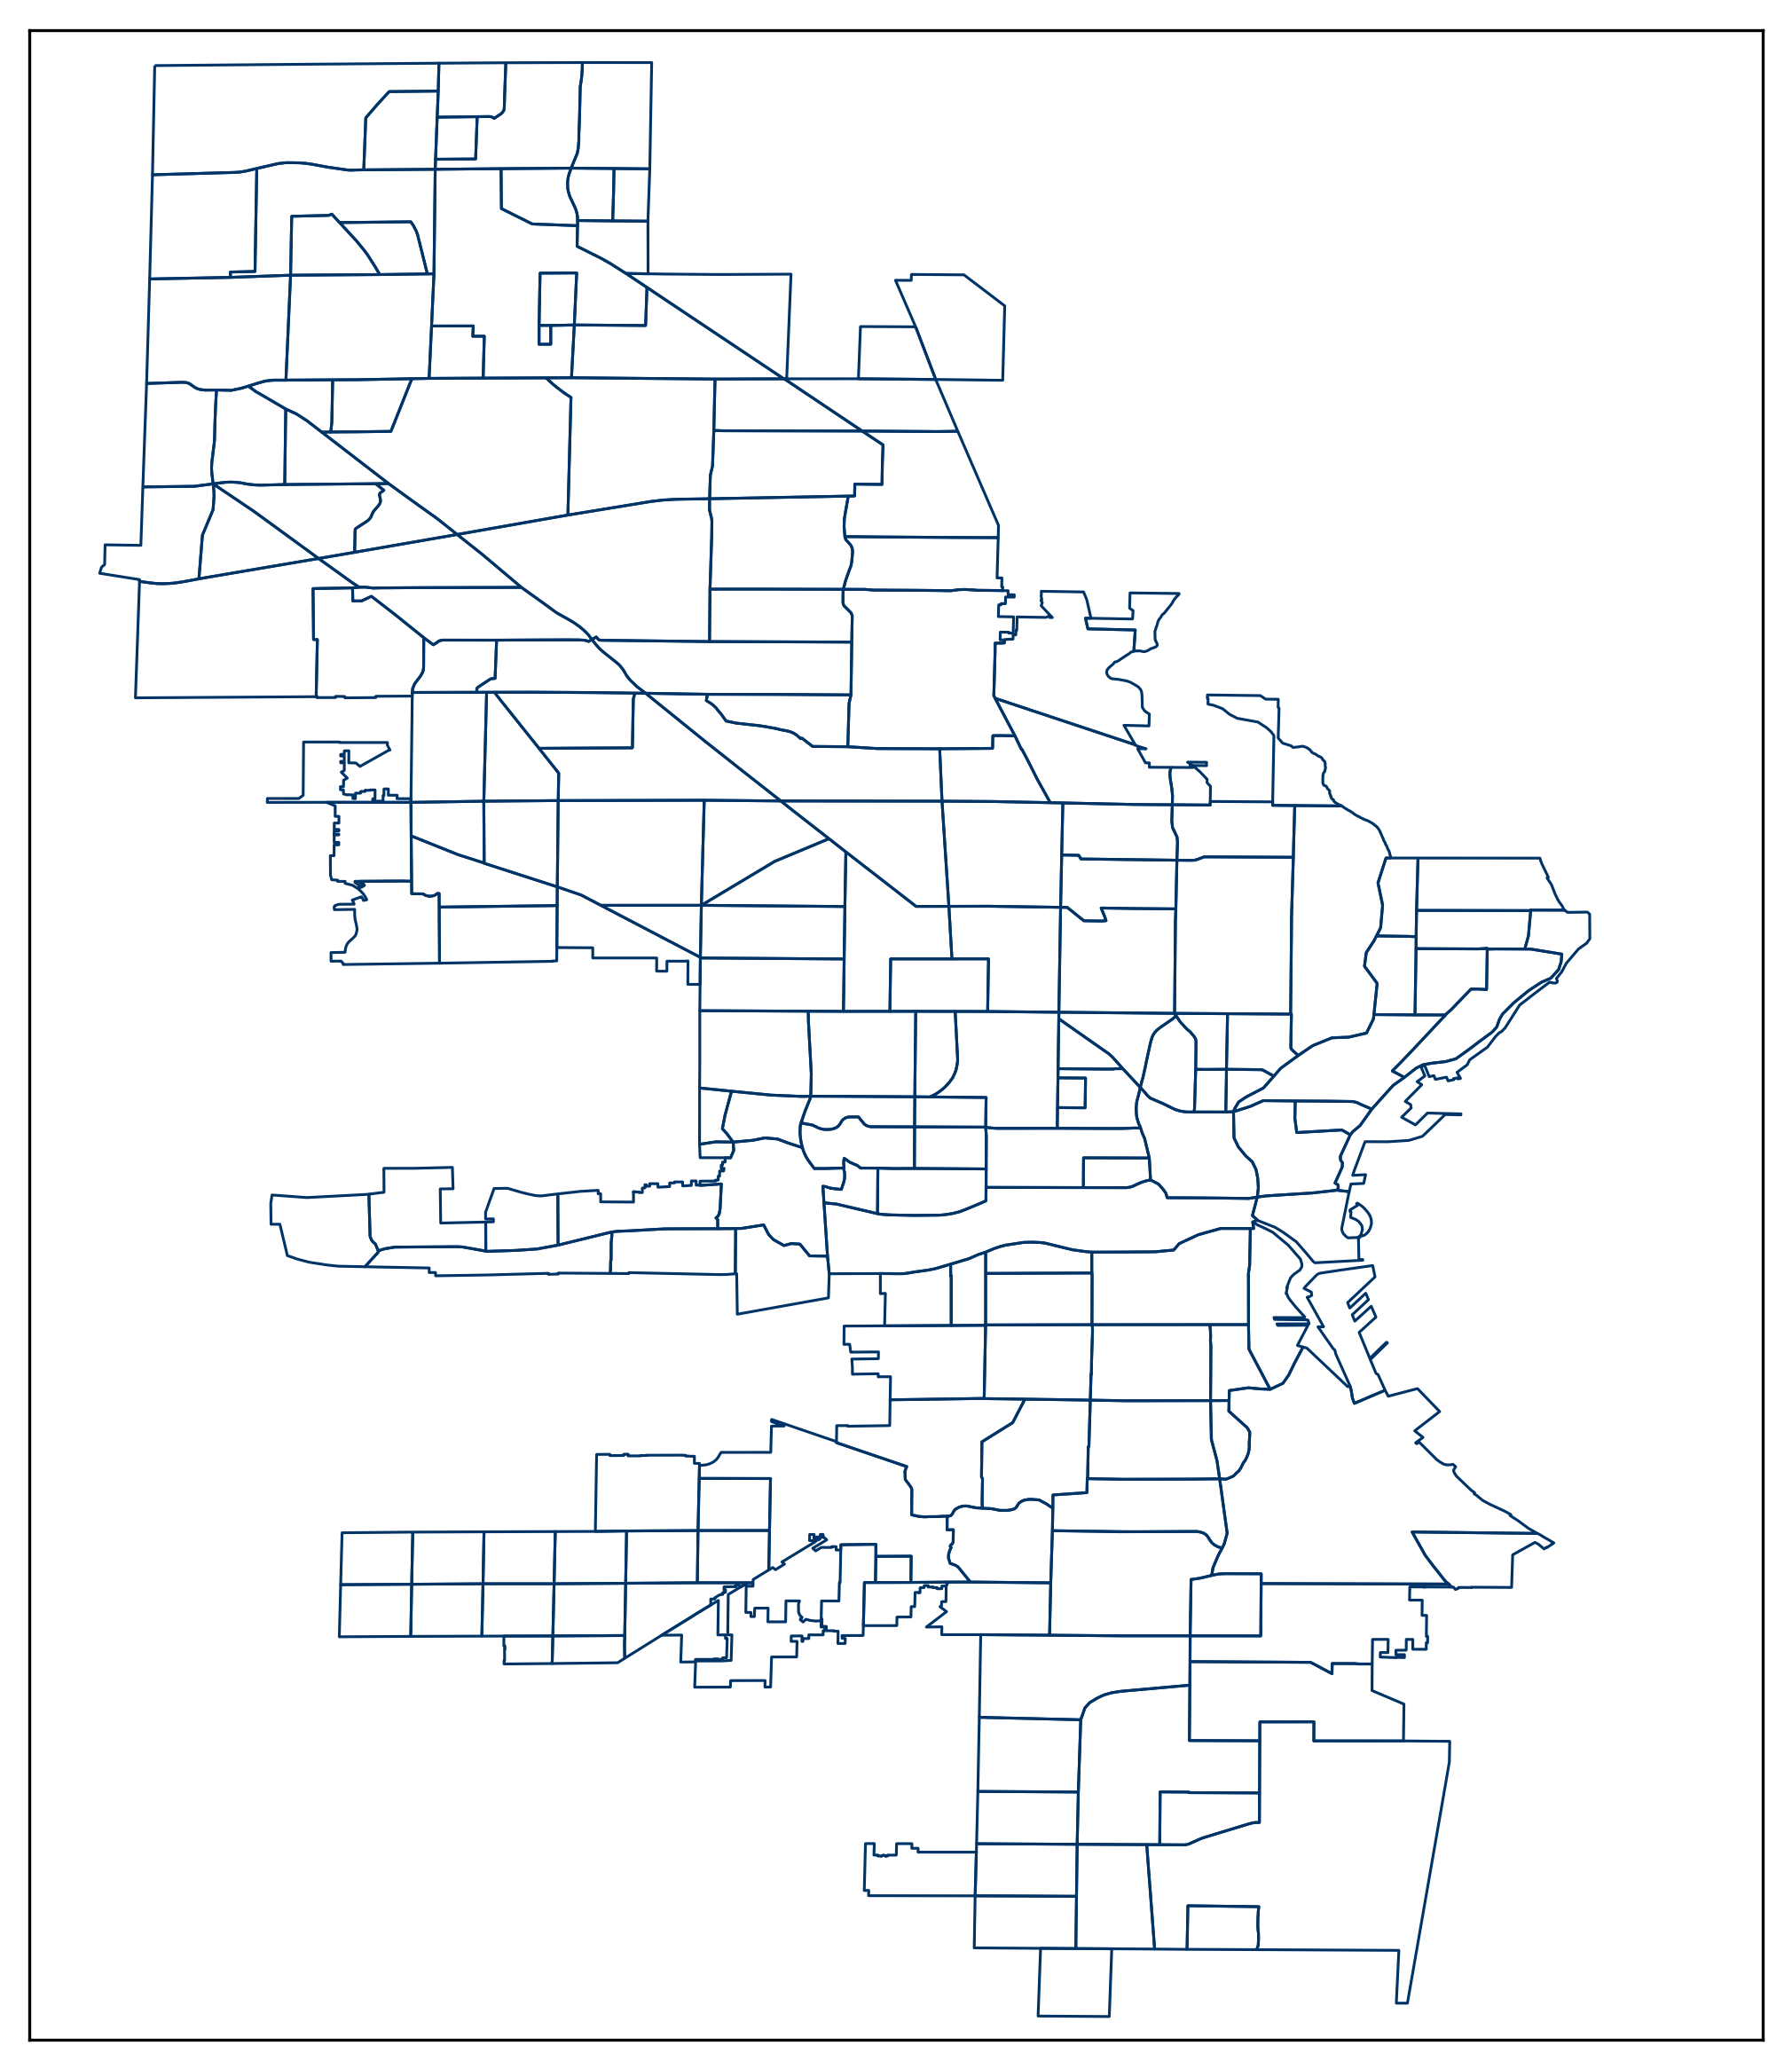

In [61]:
guilty=df[df.j_finding == 'Guilty']
guilty=guilty.append(df[df.j_finding == 'Guilty - Suspended Sentence'])
guilty2=guilty.drop_duplicates(['f_addr'], keep='first')
#notGuilty= df[! guilty]

fig=plt.figure(figsize=(15,10), dpi=300)
ax=fig.add_subplot(111)

map=Basemap(projection = 'cyl',
           resolution = 'h',
              lat_0 = 43.0389025,
              lon_0 = -87.9064736,
              llcrnrlon = -88.080736,
              llcrnrlat = 42.917670,
              urcrnrlon = -87.839722,
              urcrnrlat = 43.19712)
map.readshapefile('mke_nei/mke_nei', name='ald',color='#003366', linewidth=0.75)

data=guilty2
e=.0014
p=10

dbscan=DBSCAN(eps=e, min_samples=p,metric='manhattan')
labels=dbscan.fit_predict(data[['x_lng','y_lat']])
data.assign(clusterLabel=labels)

hull=ConvexHull(data[['x_lng','y_lat']])
#hull.vertices
#patches = []
poly=Polygon(data[[data.loc in hull.vertices],['x_lng','y_lat']], True, alpha=0.3, edgecolor='red')
#patches.append(poly)
#l=max(labels)

#p = PatchCollection(patches, alpha=0.4)
#ax.add_patch(poly)


#plt.scatter(data['x_lng'], data['y_lat'], s=1 ,c=labels, cmap='tab20')
#plt.title('DBScan Example')

#plt.show()